<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_arbolDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/cali_housing.csv')

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Asignacion de vector objetivo y matriz de caracteristicas
**train test split (modelo de validación)**

In [12]:
y = df['MedHouseVal']
X = df.drop(columns = 'MedHouseVal')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Se instancia el modelo**

In [13]:
# Al dejar los paréntesis vacíos, estamos eligiendo utilizar todos los parámetros por defecto
# Para que tengan los mismos resultados, establezcamos nuestro random_state al mismo número
dec_tree = DecisionTreeRegressor(random_state = 42)

  - El modelo está aprendiendo la relación entre las características (X) y el objetivo (y).

In [14]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

  - Prediccion de los valores objetivos para el conjunto de entrenamiento y de prueba

In [15]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# Evaluacion del modelo

In [16]:
# evalúen el modelo
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.600578011919574


La métrica de evaluación que se usó aquí es de R^2.  Debería estar claro que el árbol de decisión por defecto tiene una puntuación R^2 mucho más alta en los datos de entrenamiento que en los de prueba.  Esta es una indicación de que el modelo está sobreajustado.  

# Ajustar el modelo

In [17]:
# Busquen las opciones para ajustar este modelo
dec_tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Como pueden observar en el resultado de arriba, existen muchas opciones para ajustar un regresor de árbol de decisión.  El ajuste de los modelos es algo con lo que se adquiere más experiencia con el tiempo.  Por ahora, solo miremos cómo afinar un parámetro clave: la profundidad de nuestro árbol.  

El valor por defecto para max_depth es None, por lo que el modelo que ejecutamos antes no estaba limitado.   Antes de comenzar a ajustar este parámetro, revisemos cuál era la profundidad de nuestro árbol por defecto.

In [18]:
# ¿Cuál era la profundidad de nuestro árbol por defecto?
print('La profundidad del arbol por defecto es',dec_tree.get_depth())
print('La cantidad de nodos hojas de nuestro arbol son',dec_tree.get_n_leaves())


La profundidad del arbol por defecto es 36
La cantidad de nodos hojas de nuestro arbol son 14841


# Encontrar el max_depth óptimo (ajuste de hiperparámetro)

In [19]:
# Vayamos al extremo y fijemos nuestra profundidad máxima en 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.45120526546918793
0.4308859489546041


In [20]:
# Vayamos al extremo y fijemos nuestra profundidad máxima en 15
dec_tree_2 = DecisionTreeRegressor(max_depth = 16, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.9733722182057432
0.6215935623217899


# Creacion de function para el calculo de max_depth optimo

In [21]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# intentará cada valor entre 2 y 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

[0.4308859489546041, 0.5157041192720015, 0.5667458138420974, 0.6018796993971511, 0.63493185070596, 0.6538447280444599, 0.6774907719611706, 0.6913416719998345, 0.6844129640737058, 0.6799327280494495, 0.663137763216155, 0.6516187999364897, 0.6284952086148241, 0.624301329181203, 0.6215935623217899, 0.6135189739477191, 0.6113636060811278, 0.6068831578980292, 0.6071084775805591, 0.6086287817415992, 0.6040086784602179, 0.5997584884304037, 0.6105830644126573, 0.6009210923233357, 0.6102719096459235, 0.6050009238243657, 0.5982756730171651, 0.5966883640107754, 0.6135764766496166, 0.6072784589342477, 0.596379843455616, 0.6003102222350756, 0.5937974686495275, 0.604649656128087]


**grafo muestra las profundidas del arbol en donde R2 fue mas alto**

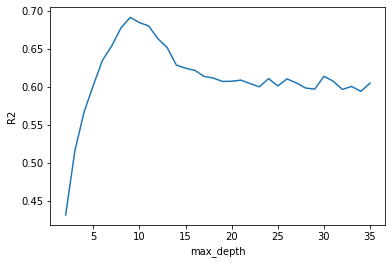

In [22]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');



podemos determinar que la profundidad que mas nos acerca al resultado es 9

**ejecucion del modelo con el valor parametro 9**

In [23]:
# Vayamos al extremo y fijemos nuestra profundidad máxima en 9
dec_tree_2 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.7961670169616584
0.6913416719998345


Se puede observar que los resultados de entrenamiento y de prueba se acercaron (una señal que hemos reducido el sobreajuste) y que la puntuación de prueba ha mejorado.